In [623]:
# Data Science
import numpy as np
import pandas as pd

# Visual
import matplotlib.pyplot as plt
import seaborn as sns

# plotly standard imports
from chart_studio import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
# import plotly.io as pio

# Cufflinks wrapper on plotly
import cufflinks as cf

In [624]:
cf.go_offline()
# Setup Global Theme
cf.set_config_file(world_readable=True, theme='space', offline=True)

# Input Cells

In [625]:
demography = pd.read_excel('data/all.xlsx')

In [626]:
demography.drop_duplicates('ID', inplace=True)

In [627]:
demography = demography.drop('ID', axis=1)

In [ ]:
demography.value_counts('Favourite category').iplot(kind='bar', linecolor="black", title="Count by Category")

# Weekly income + Quality

In [628]:
demography.groupby('Favourite category').mean()

,Age,Weekly income,Preferred quality
Favourite category,,,
Asian cuisine,54.204545,75.795455,0.447727
Czech cuisine,51.938389,56.293839,0.395071
Italian cuisine,51.162162,88.686486,0.448595


In [629]:
demography.groupby('Favourite category').median()

,Age,Weekly income,Preferred quality
Favourite category,,,
Asian cuisine,56.0,65.0,0.41
Czech cuisine,48.0,37.0,0.34
Italian cuisine,52.0,48.0,0.39


In [630]:
cz = demography[demography['Favourite category'] == 'Czech cuisine']
asian = demography[demography['Favourite category'] == 'Asian cuisine']
it = demography[demography['Favourite category'] == 'Italian cuisine']

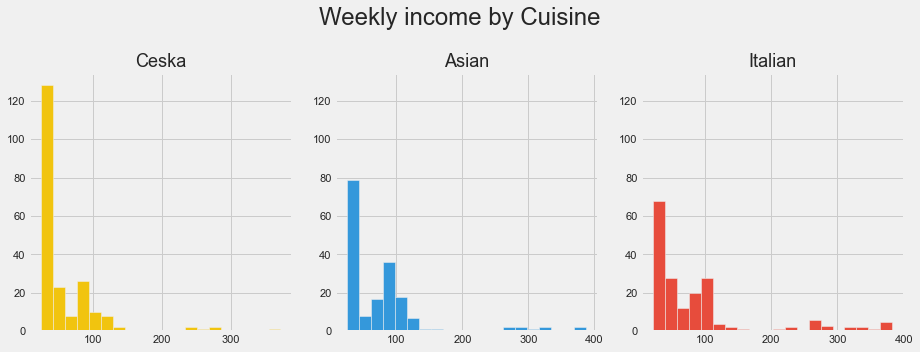

In [632]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(13,5))
plt.suptitle("Weekly income by Cuisine", fontsize=24)
ax = plt.subplot(1,3,1)

plt.hist(cz['Weekly income'], label='Ceska', color='#f1c40f', bins=20)
plt.title('Ceska', fontsize=18)

plt.subplot(1,3, 2, sharey=ax)
plt.hist(asian['Weekly income'], label='Asian', color='#3498db', bins=20)
plt.title('Asian', fontsize=18)

plt.subplot(1,3, 3, sharey=ax)
plt.hist(it['Weekly income'], label='Italian', color='#e74c3c', bins=20)
plt.title('Italian', fontsize=18)
plt.tight_layout()

In [633]:
# plt.figure(figsize=(13,5))
# ax = plt.subplot(1,3,1)
# plt.suptitle("Preferred quality by Cuisine", fontsize=24)
#
# plt.hist(cz['Preferred quality'], label='Ceska', color='#f1c40f', bins=20)
# plt.title('Ceska', fontsize=18)
#
# plt.subplot(1,3, 2, sharey=ax)
# plt.hist(asian['Preferred quality'], label='Asian', color='#3498db', bins=20)
# plt.title('Asian', fontsize=18)
#
# plt.subplot(1,3, 3, sharey=ax)
# plt.hist(it['Preferred quality'], label='Italian', color='#e74c3c', bins=20)
# plt.title('Italian', fontsize=18)
# plt.tight_layout()

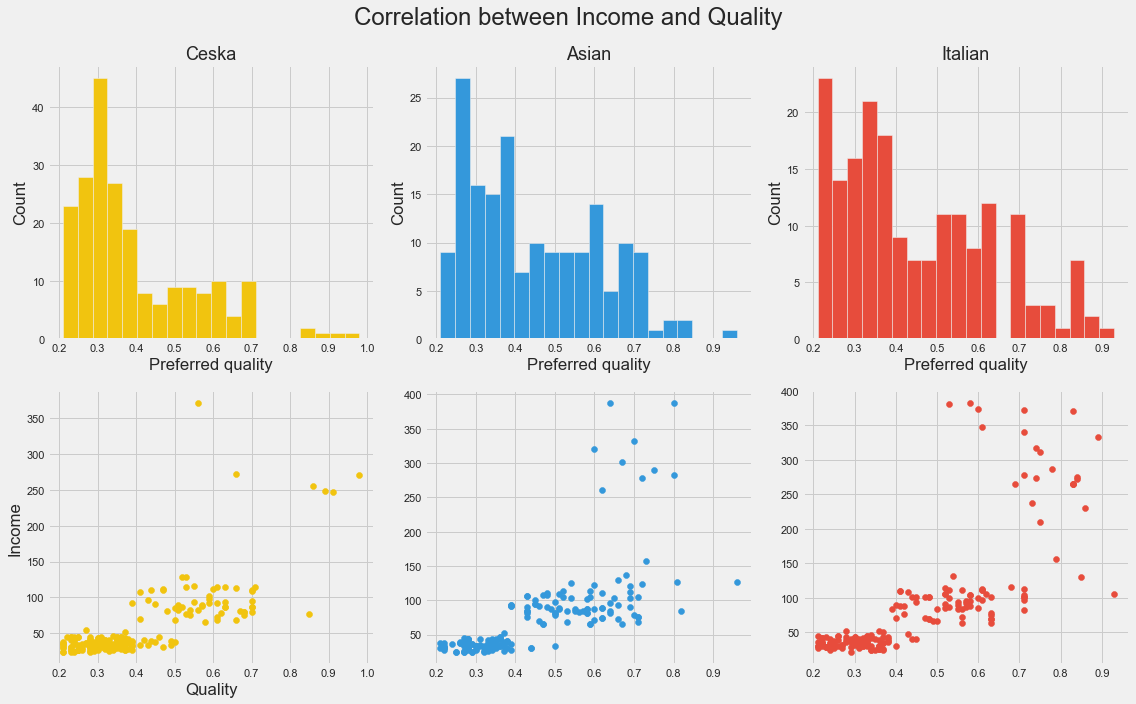

In [634]:
plt.figure(figsize=(16,10))
plt.suptitle("Correlation between Income and Quality", fontsize=24)
plt.tight_layout()

plt.subplot(2,3,1)
plt.title('Ceska', fontsize=18)
plt.hist(cz['Preferred quality'], label='Ceska', color='#f1c40f', bins=20)
plt.xlabel('Preferred quality')
plt.ylabel('Count')
plt.subplot(2,3,4)
plt.scatter(cz['Preferred quality'], cz['Weekly income'], label='Ceska', color='#f1c40f')
plt.xlabel('Quality')
plt.ylabel('Income')
# plt.ylim(0, 400)

plt.subplot(2,3,2)
plt.hist(asian['Preferred quality'], label='Asian', color='#3498db', bins=20)
plt.title('Asian', fontsize=18)
plt.xlabel('Preferred quality')
plt.ylabel('Count')
plt.subplot(2,3,5)
plt.scatter(asian['Preferred quality'], asian['Weekly income'], label='Asian', color='#3498db')

plt.subplot(2,3,3)
plt.hist(it['Preferred quality'], label='Italian', color='#e74c3c', bins=20)
plt.title('Italian', fontsize=18)
plt.xlabel('Preferred quality')
plt.ylabel('Count')
plt.subplot(2,3,6)
plt.scatter(it['Preferred quality'], it['Weekly income'], label='Italian', color='#e74c3c')
plt.tight_layout();

# Stratification by Income

In [635]:
def income_stratification(x):
    if x <= 50:
        return 'low income'
    elif 50 < x < 150:
        return 'medium income'
    return 'high income'

In [636]:
demography['Stratification by income'] = np.vectorize(income_stratification)(demography['Weekly income'])

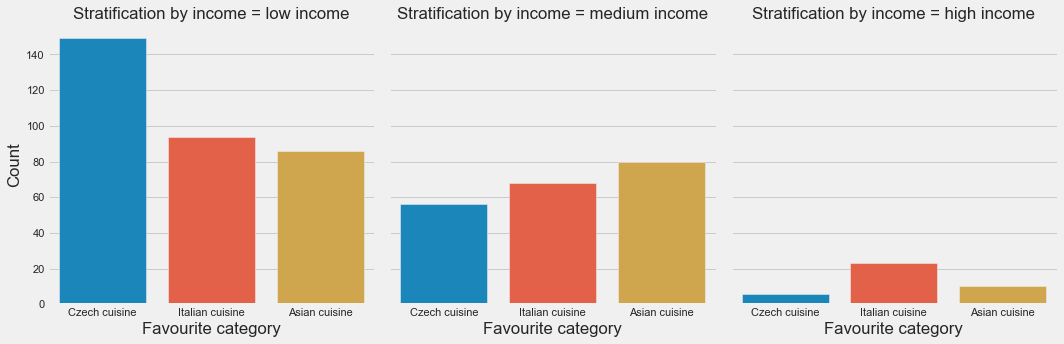

In [637]:
strat_income_category = demography.value_counts(['Favourite category', 'Stratification by income'])
strat_income_category = strat_income_category.reset_index().rename(columns={0:'Count'})
sns.catplot(
    data = strat_income_category,
    kind = 'bar',
    x = 'Favourite category',
    y = 'Count',
    col = 'Stratification by income',
    ci = None
);

# Favourite category

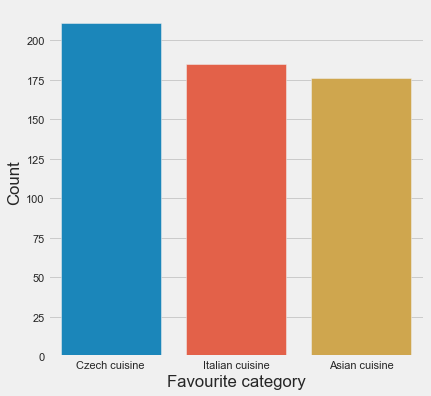

In [640]:
fixed_fcat = demography.value_counts('Favourite category').reset_index().rename(columns={0:'Count'})

plt.figure(figsize=(6,6))
sns.barplot(data=fixed_fcat, x='Favourite category', y='Count')
sns.set_theme(style="whitegrid")

# Ad Type

In [641]:
demography.value_counts('Favourite ad type')

Favourite ad type
promo stand big          216
citylight                 96
print-on-bus              82
Built-up                  41
promo stand small         40
billboard                 33
hostess on the street     33
Outskirts                 18
flyer distribution         6
City center                4
radio spot                 3
dtype: int64

# Ad Type by Category (Asia, Czechia, Italia)

In [642]:
cat_ad_graph = demography[['Favourite ad type', 'Favourite category']].groupby('Favourite ad type').value_counts()\
    .unstack()

In [643]:
asia = cat_ad_graph['Asian cuisine'].reset_index()

In [644]:
czech = cat_ad_graph['Czech cuisine'].reset_index()

In [645]:
italia =  cat_ad_graph['Italian cuisine'].reset_index()

#================================================

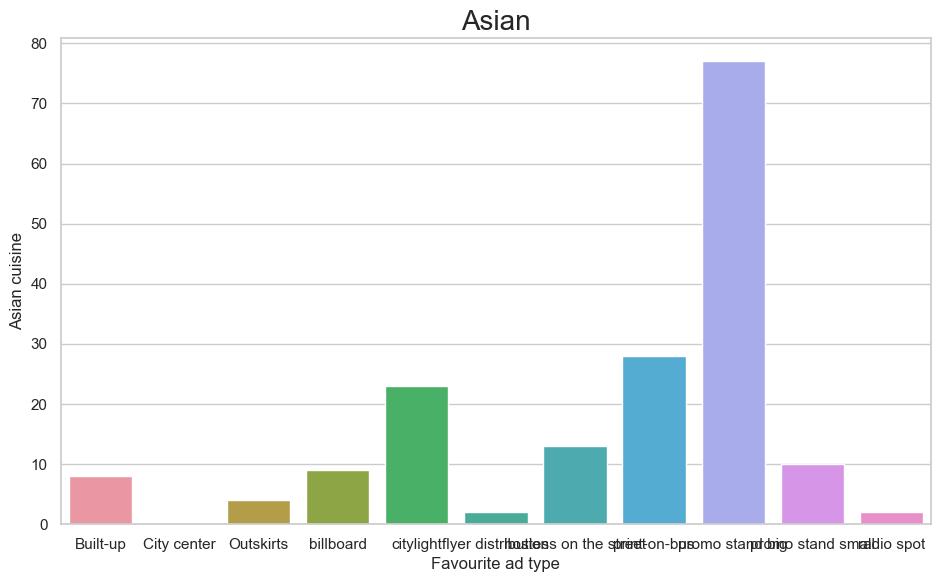

In [646]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=asia, x='Favourite ad type', y='Asian cuisine')
plt.title('Asian', fontsize=20);

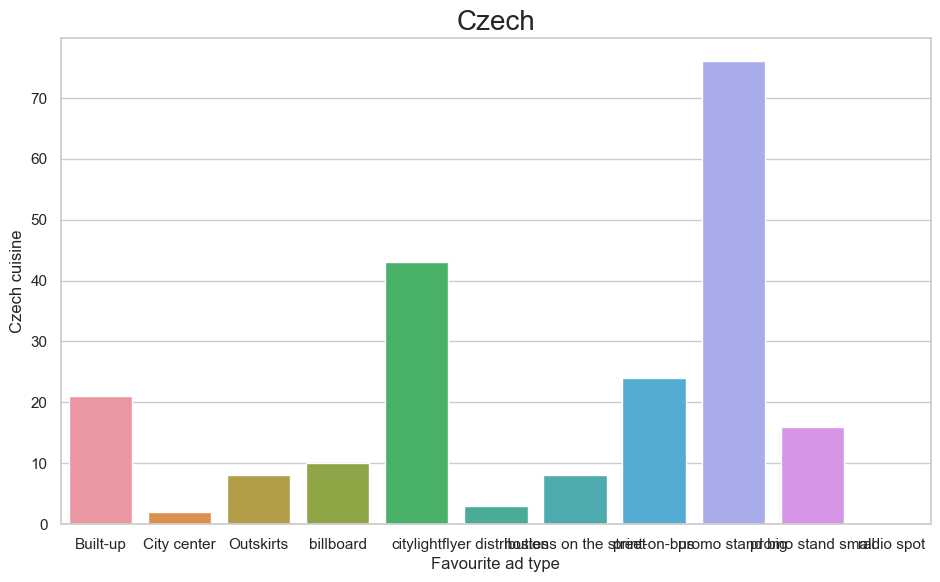

In [647]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=czech, x='Favourite ad type', y='Czech cuisine')
plt.title('Czech', fontsize=20);

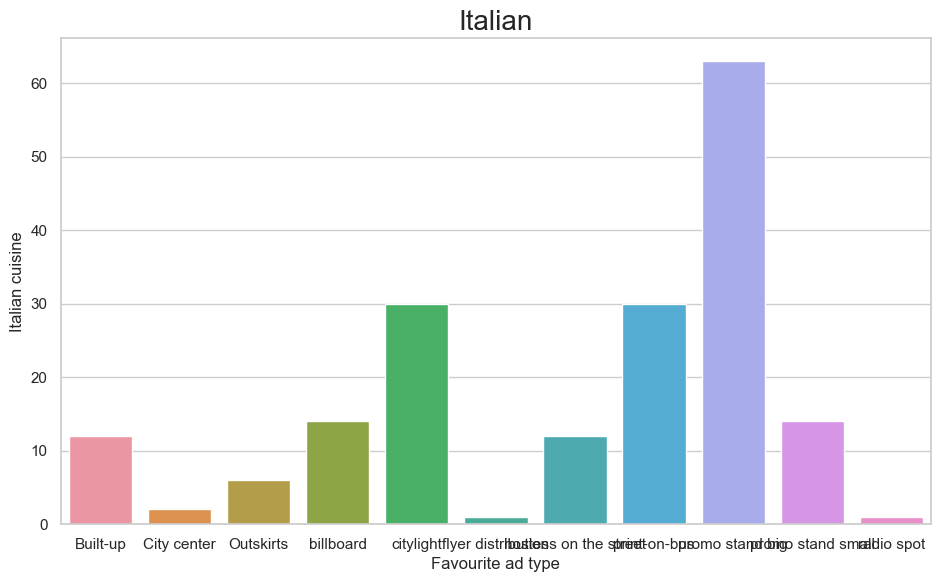

In [648]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=italia, x='Favourite ad type', y='Italian cuisine')
plt.title('Italian', fontsize=20);

<AxesSubplot:xlabel='Favourite ad type', ylabel='Italian cuisine'>

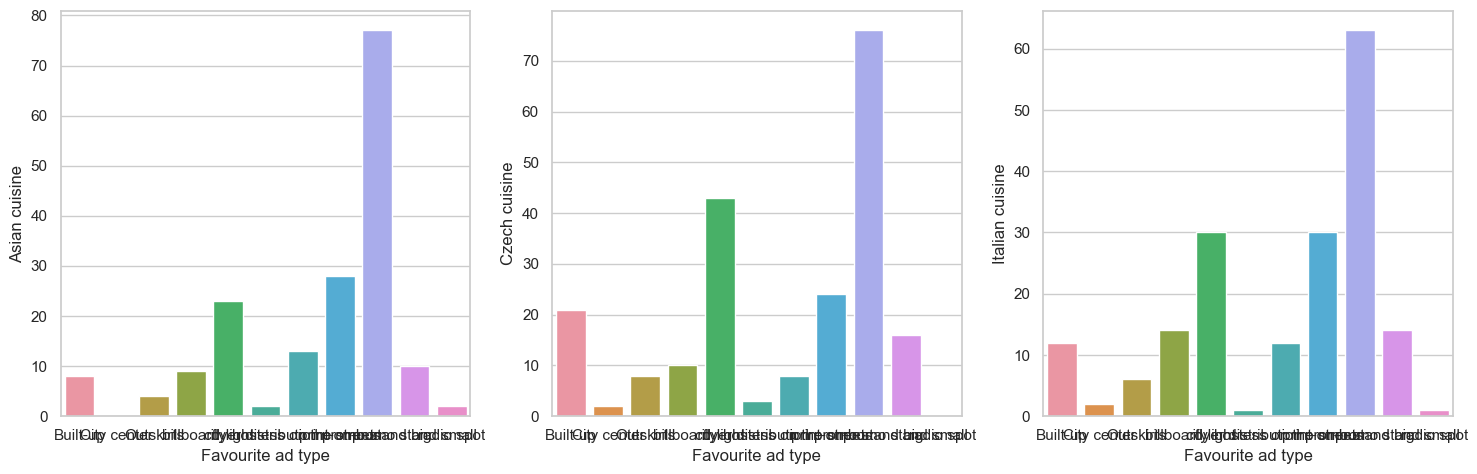

In [649]:
fig, axes = plt.subplots(ncols=3, figsize=(16,5), dpi=100)

sns.barplot(data=asia, x='Favourite ad type', y='Asian cuisine', ax=axes[0])
sns.barplot(data=czech, x='Favourite ad type', y='Czech cuisine', ax=axes[1])
sns.barplot(data=italia, x='Favourite ad type', y='Italian cuisine', ax=axes[2])

# Более точная выборка дней по кухне и рекламе [cz, asian, it]

In [650]:
ad = cz['Favourite ad type'] == 'promo stand big'
quality = cz['Preferred quality'].between(0.25,0.4)
weekly = cz['Weekly income'].between(30,50)

In [652]:
cz_df = cz[ad & quality & weekly]

In [653]:
top_locations = cz_df.describe(include='object')

In [654]:
top_locations.drop(['count', 'unique'], inplace=True)

In [655]:
top_locations.transpose().reset_index().drop([0,1,2,3])

,index,top,freq
4,MON 0-8h,Industrial district,20
5,MON 8-16h,Industrial district,24
6,MON 16-24h,Housing district,31
7,TUE 0-8h,Outskirts,19
8,TUE 8-16h,Industrial district,22
9,TUE 16-24h,Housing district,33
10,WED 0-8h,Industrial district,22
11,WED 8-16h,Industrial district,18
12,WED 16-24h,Housing district,18
13,THU 0-8h,Outskirts,19


In [656]:
metriki = cz_df.describe()

In [657]:
metriki.loc[['mean', '50%']].transpose()

,mean,50%
Age,51.212121,52.00
Weekly income,37.878788,37.00
Preferred quality,0.331818,0.35


# WIP

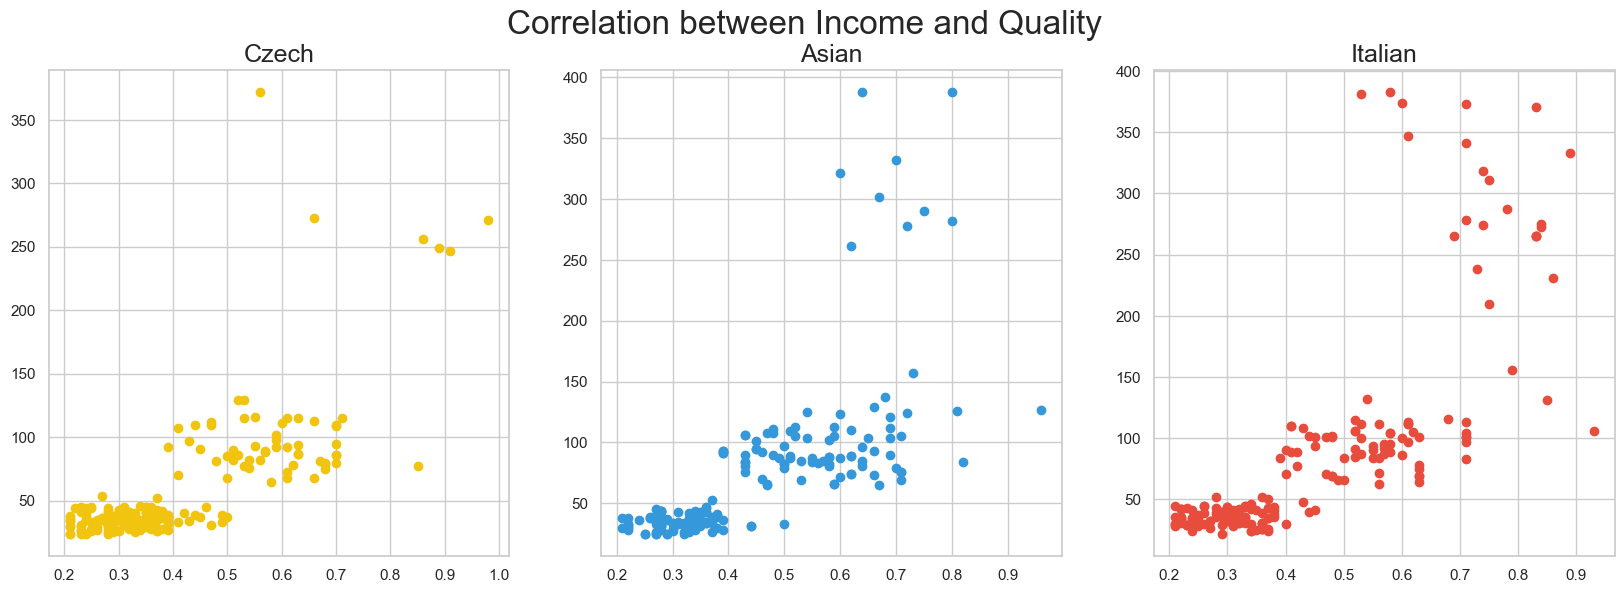

In [658]:
plt.figure(figsize=(18,6), dpi=100)
plt.suptitle("Correlation between Income and Quality", fontsize=24)
plt.tight_layout()

plt.subplot(1,3,1)
plt.title('Czech', fontsize=18)
plt.scatter(cz['Preferred quality'], cz['Weekly income'], label='Ceska', color='#f1c40f')

plt.subplot(1,3,2)
plt.title('Asian', fontsize=18)
plt.scatter(asian['Preferred quality'], asian['Weekly income'], label='Asian', color='#3498db')

plt.subplot(1,3,3)
plt.title('Italian', fontsize=18)
plt.scatter(it['Preferred quality'], it['Weekly income'], label='Italian', color='#e74c3c');

In [659]:
asian.iplot(
    x='Preferred quality',
    y='Weekly income',
    # Указываем категорию
    mode='markers',
    xTitle='Preferred quality',
    yTitle='Weekly income',
    title='Asian',
    bestfit=True,
    bestfit_colors=["blue"])

Exception: statsmodels is required: please run pip install statsmodels

In [662]:
czz = demography[demography['Favourite category'] == 'Czech cuisine']

In [663]:
czz

,Name,Age,Gender,Weekly income,Preferred quality,Favourite category,Favourite ad type,MON 0-8h,MON 8-16h,MON 16-24h,...,FRI 0-8h,FRI 8-16h,FRI 16-24h,SAT 0-8h,SAT 8-16h,SAT 16-24h,SUN 0-8h,SUN 8-16h,SUN 16-24h,Stratification by income
4,PU,18,Male,29,0.26,Czech cuisine,promo stand big,Industrial district,Industrial district,Housing district,...,Outskirts,Outskirts,Housing district,Outskirts,Outskirts,Housing district,Industrial district,Outskirts,Housing district,low income
5,GP,44,Male,42,0.35,Czech cuisine,promo stand big,Outskirts,Outskirts,Housing district,...,Outskirts,Industrial district,Housing district,Outskirts,Industrial district,Housing district,Industrial district,Industrial district,Housing district,low income
9,VD,20,Female,26,0.30,Czech cuisine,promo stand big,Outskirts,Industrial district,Housing district,...,Outskirts,Industrial district,Housing district,Industrial district,Industrial district,Park,Industrial district,Industrial district,Housing district,low income
10,UN,83,Female,36,0.32,Czech cuisine,promo stand big,Industrial district,Industrial district,Housing district,...,Industrial district,Industrial district,Housing district,Outskirts,Outskirts,Housing district,Industrial district,Industrial district,Housing district,low income
12,NH,61,Female,43,0.31,Czech cuisine,promo stand big,Outskirts,Industrial district,Housing district,...,Industrial district,Industrial district,Housing district,Outskirts,Industrial district,Housing district,Industrial district,Outskirts,Housing district,low income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,VX,51,Male,35,0.27,Czech cuisine,Built-up,Built-up,Outskirts,Built-up,...,Outskirts,Outskirts,Outskirts,Outskirts,Outskirts,Built-up,Outskirts,Outskirts,NaN,low income
565,BI,30,Male,86,0.52,Czech cuisine,Built-up,City center,City center,City center,...,Outskirts,Outskirts,Outskirts,Outskirts,Outskirts,Outskirts,Outskirts,City center,NaN,medium income
567,CX,79,Female,37,0.31,Czech cuisine,Outskirts,Built-up,Outskirts,Built-up,...,City center,Outskirts,Built-up,Built-up,Built-up,Built-up,Outskirts,Built-up,NaN,low income
568,UA,30,Male,34,0.33,Czech cuisine,Outskirts,Built-up,Outskirts,Built-up,...,Built-up,Outskirts,Built-up,Outskirts,Outskirts,Built-up,Outskirts,Built-up,NaN,low income


In [670]:
czz[czz['Stratification by income'] == 'low income'].value_counts('Favourite ad type')

Favourite ad type
promo stand big          52
citylight                32
print-on-bus             21
Built-up                 14
promo stand small        12
Outskirts                 7
hostess on the street     6
flyer distribution        3
City center               2
dtype: int64